In [1]:
import numpy as np

In [2]:
def isprime(x):
    if x == 0:
        return 0
    if x == 1 or x == 2:
        return 1
    for i in range(2, x):
        if x % i == 0:
            return 0 
        else:
            return 1
X = [i for i in range(8)]
y = [isprime(i) for i in X]

def map_last_digit(data):
    X_train = []
    for number in data:
        number = ord(str(number))
        binary_representation = bin(number)[5:]
        list_of_integers = [int(digit) for digit in binary_representation]
        X_train.append(list_of_integers)
    return np.array(X_train)
X_train = map_last_digit(X)
y_train = np.array(y)

In [3]:
print(X_train)
print(y_train)

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[0 1 1 1 0 1 0 1]


In [11]:
class NeuralNetwork:
    def __init__(self, layer_1: int, layer_2: int, output_size: int):
        self.weights_1 = np.full((layer_1, layer_1), 0.5)
        self.weights_2 = np.full((layer_2, output_size), 0.5)
        self.biases_1 = np.zeros((1, layer_2))
        self.biases_2 = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def train(self, X, y, learning_rate, epochs, verbose:bool=False):
        SSR = []
        for epoch in range(epochs):
            total_error = 0
            total_error_squared = 0
            for inputs, label in zip(X, y):
                forward_1 = [inputs @ self.weights_1] + self.biases_1
                activated_1 = self.sigmoid(forward_1)
                forward_2 = activated_1 @ self.weights_2 + self.biases_2
                output = self.sigmoid(forward_2)[0][0]

                error = label - output
                SSR.append(error ** 2)
                total_error += np.sum(error)
                total_error_squared += np.sum(error ** 2)

                bias_2_delta = -2 * total_error * self.sigmoid_derivative(forward_2)
                bias_1_delta = self.weights_2.T * self.sigmoid_derivative(forward_1)
                weights_2_delta = bias_2_delta * activated_1
                weights_1_delta = bias_2_delta * bias_1_delta * inputs
                    
                self.biases_2 -= bias_2_delta * learning_rate
                self.weights_2 -= weights_2_delta.T * learning_rate
                self.biases_1 -= bias_2_delta * bias_1_delta * learning_rate
                self.weights_1 = (self.weights_1.T - (weights_1_delta * learning_rate)).T

            if verbose:
                print(f"Epoch {epoch+1}/{epochs},\n"
                      f"Total Error: {total_error_squared},\n"
                      f"absolute_error: {total_error}\n"
                      f"{print('='*100)}")  
        return SSR
            
                 
    def predict(self, inputs):
        forward_1 = [inputs @ self.weights_1] + self.biases_1
        activated_1 = self.sigmoid(forward_1)
        forward_2 = activated_1 @ self.weights_2 + self.biases_2
        output = self.sigmoid(forward_2)[0][0]
        return output

In [12]:
nn = NeuralNetwork(3, 3, 1)

weights_his = nn.train(X_train, y_train, 0.1, 500, verbose=True)

Epoch 1/500,
Total Error: 1.8737445692098318,
absolute_error: -0.6702286101580014
None
Epoch 2/500,
Total Error: 1.8394156114100064,
absolute_error: -0.2151640852212947
None
Epoch 3/500,
Total Error: 1.8404230574337244,
absolute_error: -0.06178914132230473
None
Epoch 4/500,
Total Error: 1.840852000308688,
absolute_error: -0.02655595947223044
None
Epoch 5/500,
Total Error: 1.8401818237672438,
absolute_error: -0.019782932054196345
None
Epoch 6/500,
Total Error: 1.839229241518012,
absolute_error: -0.018981223576693296
None
Epoch 7/500,
Total Error: 1.8382096770524992,
absolute_error: -0.019395824747522994
None
Epoch 8/500,
Total Error: 1.837168741424072,
absolute_error: -0.0200577657165526
None
Epoch 9/500,
Total Error: 1.836115674456845,
absolute_error: -0.020771106943287432
None
Epoch 10/500,
Total Error: 1.8350522926925443,
absolute_error: -0.02149629093615102
None
Epoch 11/500,
Total Error: 1.833978912304413,
absolute_error: -0.022225331016625827
None
Epoch 12/500,
Total Error: 1.8328

In [13]:
import matplotlib.pyplot as plt
e = range(1, len(weights_his) + 1)

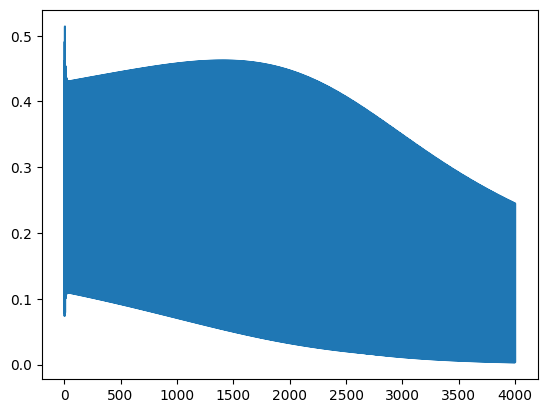

In [14]:
plt.plot(e, weights_his)